In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import InceptionV3

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_data = np.concatenate((x_train, x_test))
y_data = np.concatenate((y_train, y_test))

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.5, random_state=42)

print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)



x_train shape: (30000, 32, 32, 3)
y_train shape: (30000, 1)
x_test shape: (30000, 32, 32, 3)
y_test shape: (30000, 1)


In [4]:
alex_net = tf.keras.models.Sequential([
    layers.Conv2D(96, 11, strides=4, padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(2),

    layers.Conv2D(256, 5, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(2),

    layers.Conv2D(384, 3, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Conv2D(384, 3, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Conv2D(256, 3, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(2),

    layers.Flatten(),
    layers.Dense(4096),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Dense(4096),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Dense(10, activation='softmax')
])


In [5]:
alex_net.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = alex_net.fit(x_train, y_train, epochs=2,
                    validation_data=(x_test, y_test))


Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


938/938 [==============================] - 27s 19ms/step - loss: 2.0579 - accuracy: 0.3276 - val_loss: 7.0085 - val_accuracy: 0.1522
Epoch 2/2
938/938 [==============================] - 16s 18ms/step - loss: 1.7322 - accuracy: 0.4304 - val_loss: 2.2093 - val_accuracy: 0.3280


938/938 - 3s - loss: 2.2093 - accuracy: 0.3280 - 3s/epoch - 4ms/step


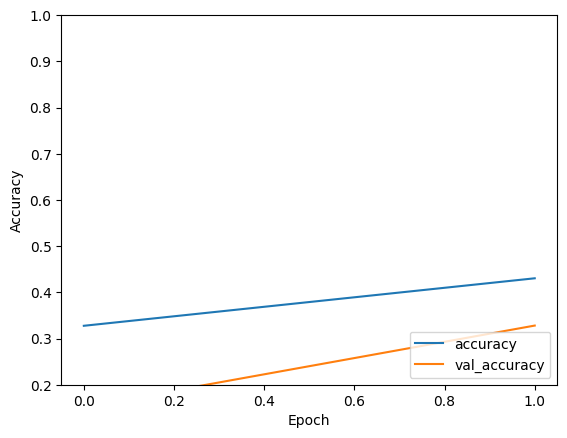

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label= 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')
test_loss, test_acc = alex_net.evaluate(x_test,y_test, verbose=2)


In [7]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers

baseModel = VGG16(weights="imagenet", include_top=False, input_tensor=layers.Input(shape=(32, 32, 3)))

headModel = baseModel.output
headModel = layers.Flatten(name="flatten")(headModel)
headModel = layers.Dense(64, activation="relu")(headModel)
headModel = layers.Dense(128, activation="relu")(headModel)
headModel = layers.Dense(128, activation="relu")(headModel)
headModel = layers.Dense(128, activation="relu")(headModel)
headModel = layers.Dense(256, activation="relu")(headModel)
headModel = layers.Dense(10, activation="softmax")(headModel)

vgg_16_2 = tf.keras.Model(inputs=baseModel.input, outputs=headModel)



In [ ]:
vgg_16_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = vgg_16_2.fit(x_train, y_train, epochs=2,
                    validation_data=(x_test, y_test))

Epoch 1/2
279/938 [=======>......................] - ETA: 19s - loss: 2.2278 - accuracy: 0.1457

In [ ]:

plt.plot(history.history['accuracy'], label= 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')
test_loss, test_acc = alex_net.evaluate(x_test,y_test, verbose=2)


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers

baseModel = ResNet50(weights="imagenet", input_tensor=layers.Input(shape=(32, 32, 3)))

headModel = baseModel.output
headModel = layers.Flatten(name="flatten")(headModel)
headModel = layers.Dense(64, activation="relu")(headModel)
headModel = layers.Dense(64, activation="relu")(headModel)
headModel = layers.Dense(64, activation="relu")(headModel)
headModel = layers.Dense(128, activation="relu")(headModel)
headModel = layers.Dense(128, activation="relu")(headModel)
headModel = layers.Dense(10, activation="softmax")(headModel)

res_net = tf.keras.Model(inputs=baseModel.input, outputs=headModel)


In [ ]:
res_net.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = res_net.fit(x_train, y_train, epochs=2,
                    validation_data=(x_test, y_test))

In [ ]:

plt.plot(history.history['accuracy'], label= 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')
test_loss, test_acc = alex_net.evaluate(x_test,y_test, verbose=2)


In [ ]:
import cv2
from tensorflow.keras.utils import to_categorical
def GoogLeNet(input_shape=(32, 32, 3), num_classes=10):
    model = tf.keras.applications.InceptionV3(
        include_top=True,
        weights=None,
        input_tensor=None,
        input_shape=input_shape,
        pooling=None,
        classes=num_classes,
    )
    return model

x_train = np.array([cv2.resize(img, (75, 75)) for img in x_train])
x_test = np.array([cv2.resize(img, (75, 75)) for img in x_test])

x_train = x_train.reshape(-1, 75, 75, 3).astype('float32') / 255
x_test = x_test.reshape(-1, 75, 75, 3).astype('float32') / 255



y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

model = GoogLeNet(input_shape=(75, 75, 3), num_classes=10)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test))
